# Der Fehler des Mittelwertes

In [1]:
# Definition der benötigten Funktionspakete

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as colors
import math
import os

## Wir erstellen ein künstliches (quasi-analoges) Signal

In [2]:
N = 1001 # Länge des Datenvektors
t = np.linspace(0, N-1, N) # Zeitvektor von Punkten mit Abstand 1 in Einheit von Nanosekunden (als konkretes Beispiel)
# t_tot = N ns für unser Beispiel

U_real = 1.4 # unser Signal ist der Spannungswert 
noise_amp = 0.2
noise1 = np.random.normal(0,noise_amp,N) # normalverteiltes Rauschen mit Standardabweichung noise_amp
U = U_real + noise1 # das zu beobachtendes Spannungssignal

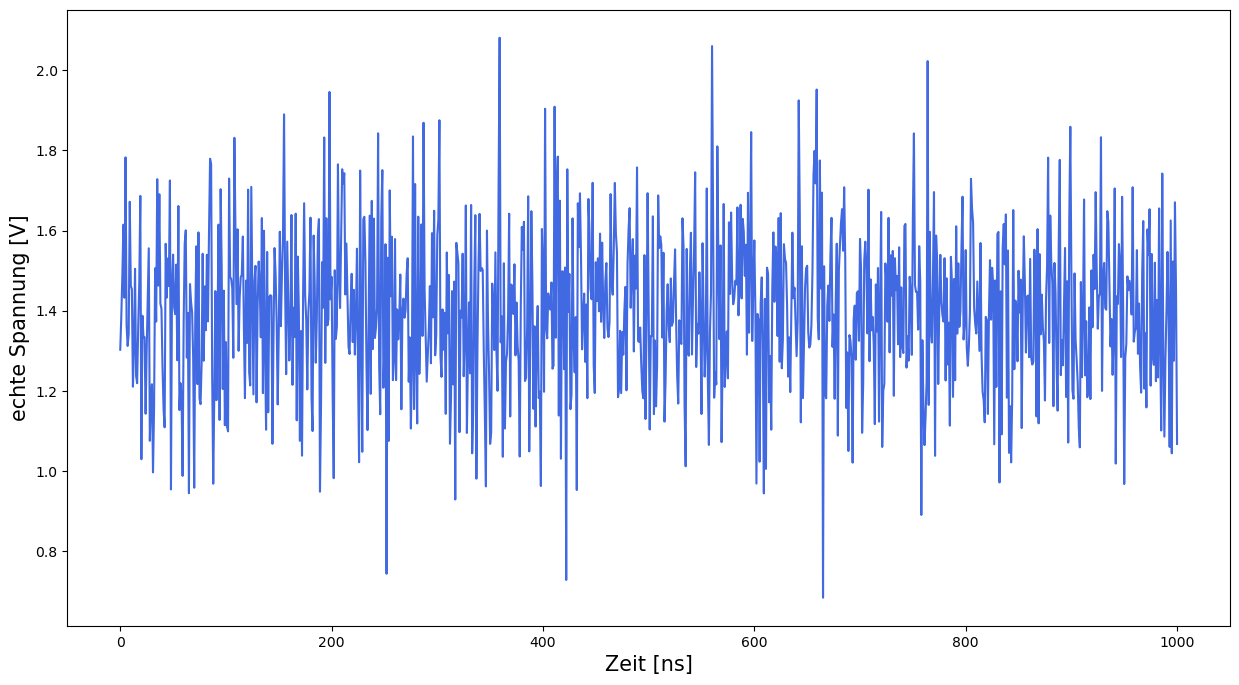

In [4]:
plt.figure(figsize=(15, 8))
plt.axes().set_aspect('auto', 'datalim')
plt.plot(t, U, color='royalblue', label="Spannung U (Ohm)")
plt.xlabel('Zeit [ns]', fontsize = 15)
plt.ylabel('echte Spannung [V]', fontsize = 15)
plt.show()

## Wir "messen" unser Signal mit einem simulierten Analog-Digital-Konverter (ADC)
### Wir wählen ideale ADC-Parameter, um die "echte" Messung zu sehen, U_mess = U. Den Einfluss nicht-idealer Parameter kann man leicht selber erforschen.

In [5]:
Delta_t = 1 # zeitl. Abstand der Messpunkte in den gewählten Einheiten: für einen Zeitvektor t mit Abständen von je 1 Nanosekunde misst unser ADC einen Datenpunkt alle Delta_t Nanosekunden
U_max = 10 # maximal messbarer Wert: alle grösseren Werte werden als U_max angezeigt ("clipping")
U_min = 0.0001 # minimaler messbarer Spannungsunterschied der Signalwerte: Spannungsauflösung des ADC
U_noise = 0.0001 # Standardabweichung des Spannungsrauschens, das dem Signal durch den Messprozess hinzugefügt wird

# Initialisierung der Messvektoren
n_mess = math.floor(N/Delta_t)-1 # Anzahl gemesener Punkte. "floor" rundet ab
n = range(n_mess) # wird für for loop benötigt, enthält 0 und n_mess als untere und obere Grenze von n
#print(n_mess)
t_mess = np.zeros(n_mess) # leerer Vektor, um die Zeitwerte zu erfassen
U_mess = np.zeros(n_mess) # leerer Vektor, um die Spannungswerte zu erfassen

for i in n:
    t_mess[i] = t[(i+1)*Delta_t] # jeder (i+1)*Delta_t-te Punkt wird gemessen
    U_mess[i] = np.clip(U_min*round((U[(i+1)*Delta_t]+np.random.normal(0,U_noise))/U_min,0),-U_max,U_max) # numpy.clip limitiert die maximalen Werte auf [-U_max,U_max]

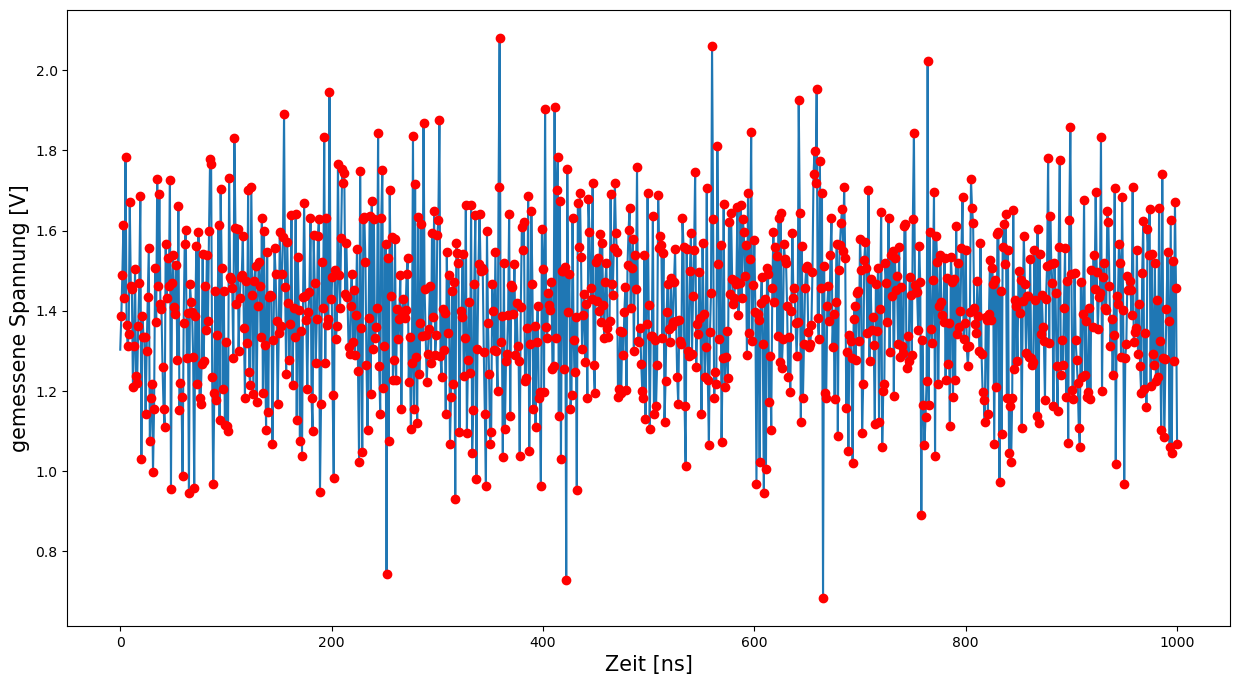

In [6]:
plt.figure(figsize=(15, 8))
plt.axes().set_aspect('auto', 'datalim')
plt.scatter(t_mess, U_mess, zorder=2, color = "red", marker='o')
plt.plot(t, U, zorder=1) # zorder erlaubt uns, auszuwählen, was im Vordergrund gezeichnet wird
plt.xlabel('Zeit [ns]', fontsize = 15)
plt.ylabel('gemessene Spannung [V]', fontsize = 15)
plt.show()

## Bestimmung des Mittelwertes und der Standardabweichung

In [7]:
n = range(n_mess) # definition des Zahlenbereichs für die Indizes
Mittelwert = np.zeros(n_mess) # leerer Vektor, um die Spannungswerte zu erfassen
Standardabweichung = np.zeros(n_mess) # leerer Vektor, um die Spannungswerte zu erfassen


for i in n:
    Mittelwert[i] = np.mean(U_mess[0:i+1]) # mean bestimmt den Mittelwert zwischen den beiden angegebenen Indizes, hier also von 1 bis i 
    Standardabweichung[i] = np.std(U_mess[0:i+1])

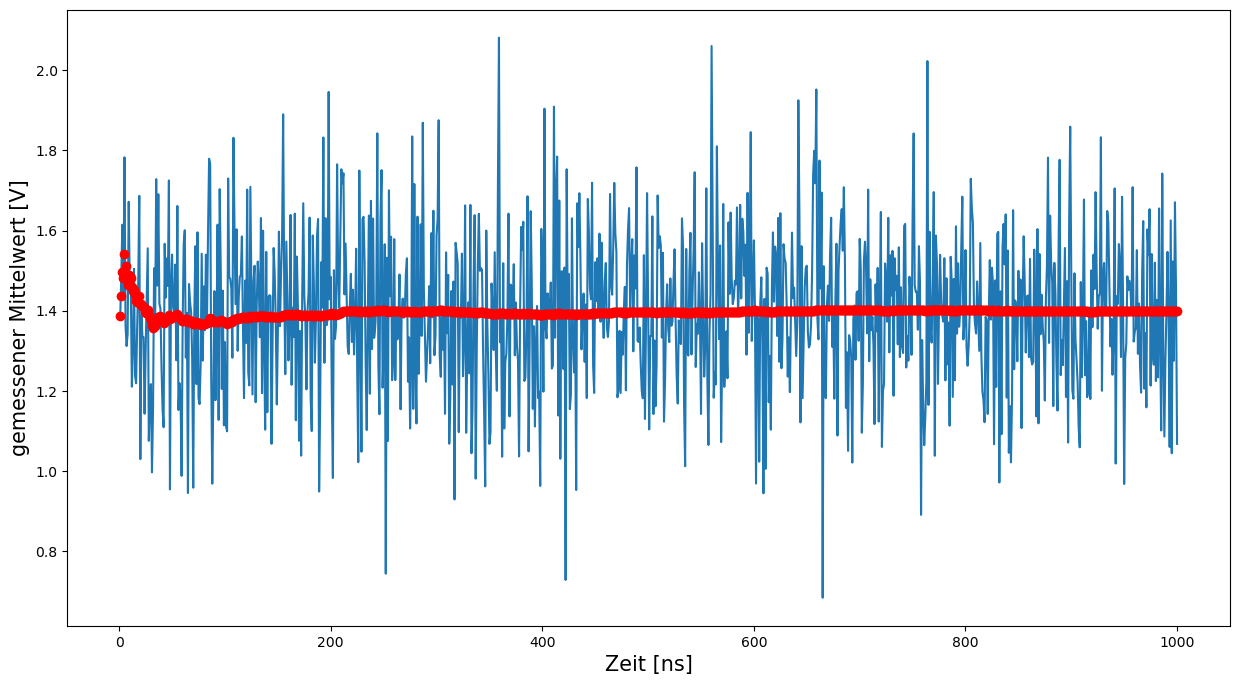

In [8]:
plt.figure(figsize=(15, 8))
plt.axes().set_aspect('auto', 'datalim')
plt.plot(t_mess, U_mess, zorder=1) # zorder erlaubt uns, auszuwählen, was im Vordergrund gezeichnet wird
plt.scatter(t_mess, Mittelwert, zorder=2, color = "red")
plt.xlabel('Zeit [ns]', fontsize = 15)
plt.ylabel('gemessener Mittelwert [V]', fontsize = 15)
plt.show()

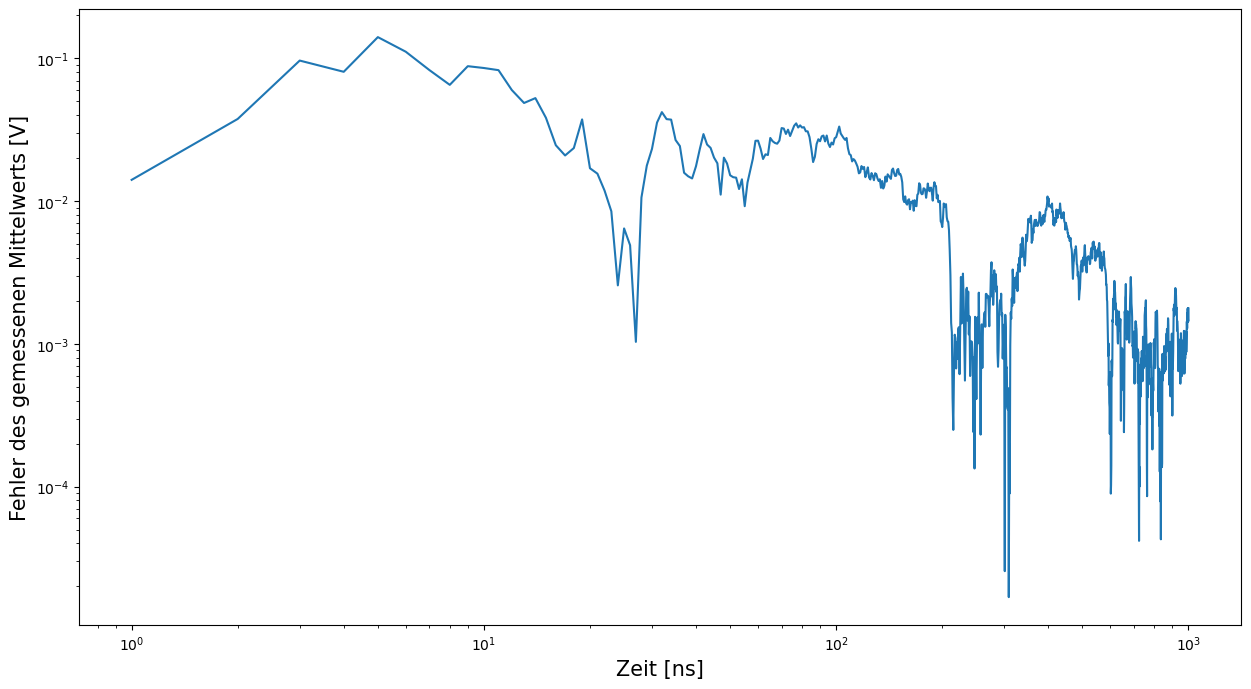

In [9]:
plt.figure(figsize=(15, 8))
plt.axes().set_aspect('auto', 'datalim')
#plt.plot(t_mess, np.abs(Mittelwert-U_real))
plt.loglog(t_mess, np.abs(Mittelwert-U_real))
plt.xlabel('Zeit [ns]',fontsize = 15)
plt.ylabel('Fehler des gemessenen Mittelwerts [V]',fontsize = 15)
plt.show()

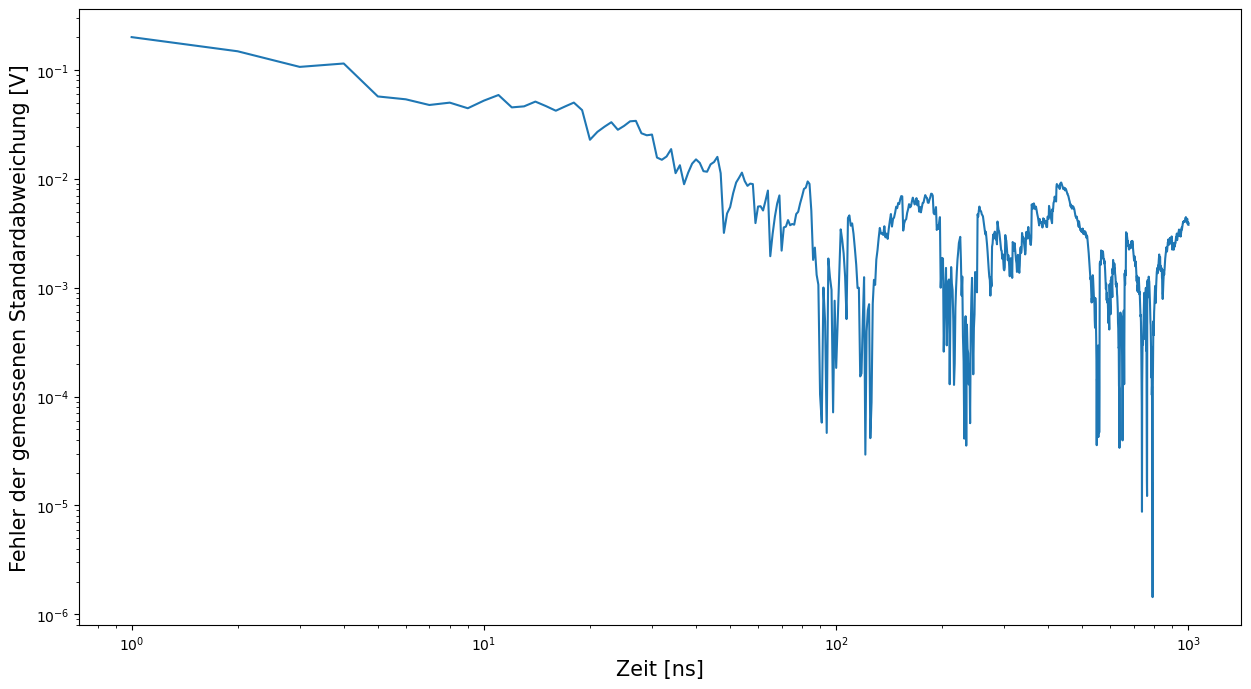

0.19622061672798302


In [10]:
plt.figure(figsize=(15, 8))
plt.axes().set_aspect('auto', 'datalim')
#plt.plot(t_mess, np.abs(Standardabweichung-noise_amp))
plt.loglog(t_mess, np.abs(Standardabweichung-noise_amp))
plt.xlabel('Zeit [ns]', fontsize = 15)
plt.ylabel('Fehler der gemessenen Standardabweichung [V]', fontsize = 15)
plt.show()

print(Standardabweichung[-1])

In [27]:
# check influence of ADC noise on standard deviation
